In [2]:
import pandas as pd
from pandas import Series
import json
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import argrelmin, argrelmax
%matplotlib inline

In [80]:
items = list()
with open("btc-eth.json") as f:
    raw = json.load(f)
    
    for idx,timestamp in enumerate(raw['chart']['result'][0]['timestamp']):
        i = dict()
        i['timestamp'] = timestamp
        items.append(i)
        
        
    def append(items, name):
        for idx,i in enumerate(raw['chart']['result'][0]['indicators']['quote'][0][name]):
            items[idx][name] = i
        
    append(items, "open")
    append(items, "high")
    append(items, "volume")
    append(items, "close")
    append(items, "low")

print(items[0])
print(items[1])




{'timestamp': 1515801600, 'open': 10.9576997756958, 'high': 10.966099739074707, 'volume': 0, 'close': 10.966099739074707, 'low': 10.9576997756958}
{'timestamp': 1515801720, 'open': 10.964900016784668, 'high': 10.982999801635742, 'volume': 0, 'close': 10.982999801635742, 'low': 10.963700294494629}


Text(0,0.5,'Price in btc-eth')

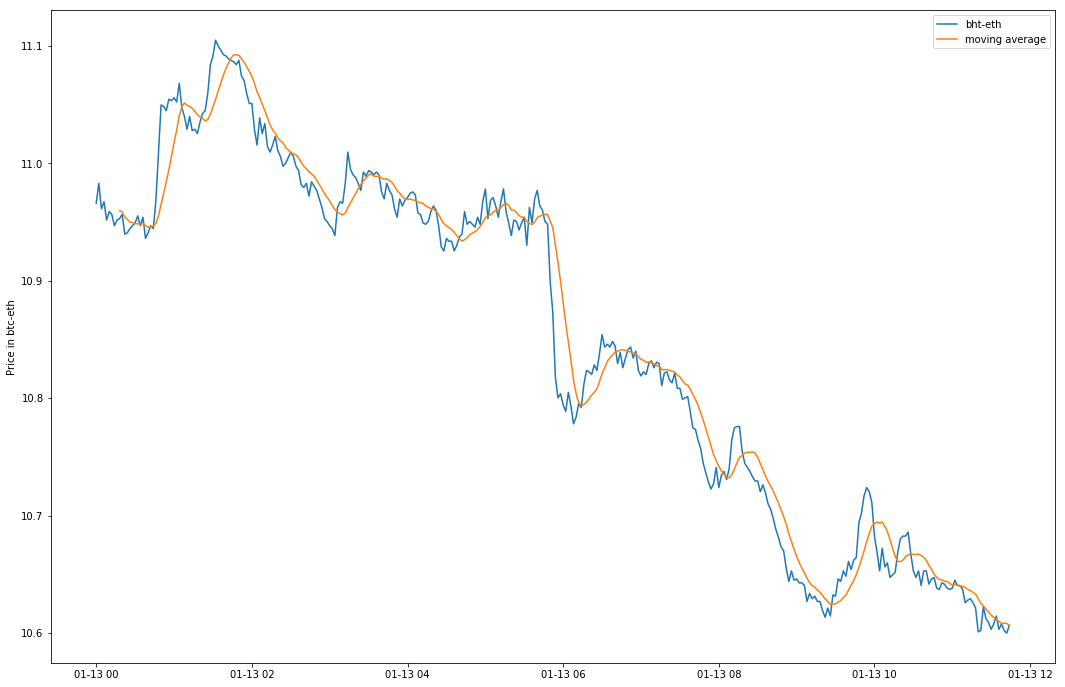

In [94]:
size=int(len(items)/10)
df = pd.DataFrame(data=items[:size])
df['time'] = pd.to_datetime(df['timestamp'], unit='s')

span = 10 # 6h
span2= 100

df['close-avg'] = df['close'].rolling(window=span).mean()
df['close-eavg'] = df['close-avg'].ewm(span=span, adjust=False).mean()
df['close-deviation'] = df['close-avg'].rolling(window=span).std()

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1)

ax.plot(df["time"], df["close"], label='bht-eth')
ax.plot(df["time"], df["close-avg"], label = 'moving average')


ax.legend(loc='best')
ax.set_ylabel('Price in btc-eth')

Text(0,0.5,'Price in btc-eth')

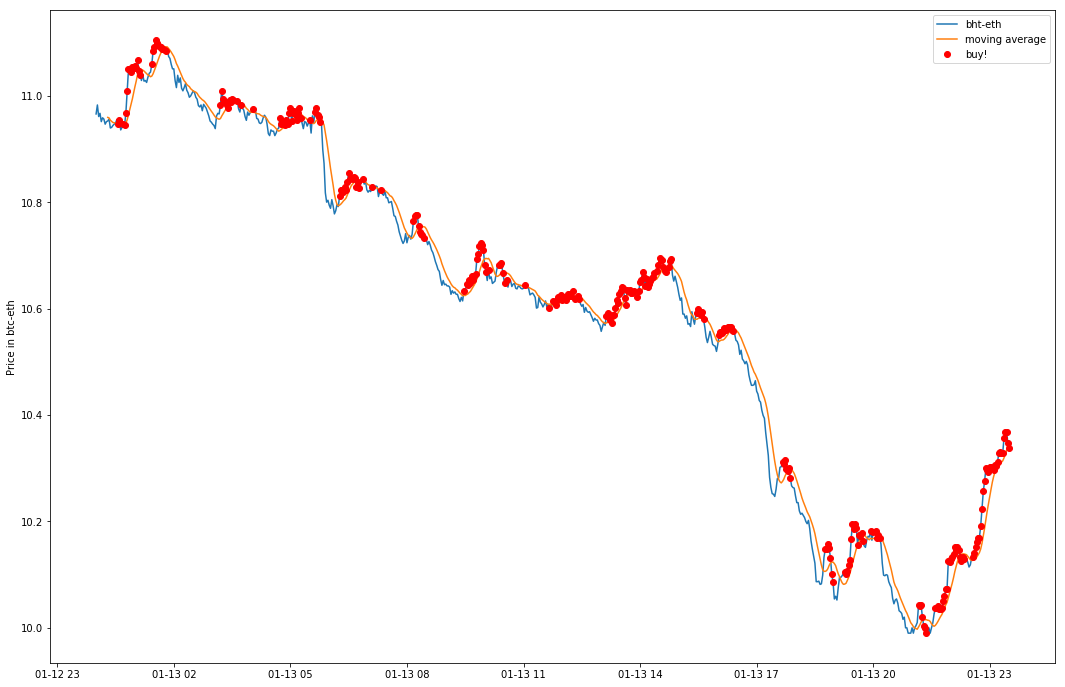

In [89]:
df['close-avg-diff'] = df['close-avg'].diff()

before=True
l = list()
for x in df['close-avg-diff'][:]:
    if not x or x >= 0:
        y = True
    else:
        y = False
    
    if y != before:
        before = y
    l.append(y)
    
df['close-avg-diff-x'] = pd.Series(l)
df['close-avg-diff-x1'] = df[df['close-avg-diff-x'] == True].close

fig2 = plt.figure(figsize=(18,12))
ax = fig2.add_subplot(1,1,1)

ax.plot(df["time"], df["close"], label='bht-eth')
ax.plot(df["time"], df["close-avg"], label = 'moving average')
ax.plot(df["time"], df["close-avg-diff-x1"], 'o', label = 'buy!', linewidth=4, color="red")

ax.legend(loc='best')
ax.set_ylabel('Price in btc-eth')

Text(0,0.5,'Price in btc-eth')

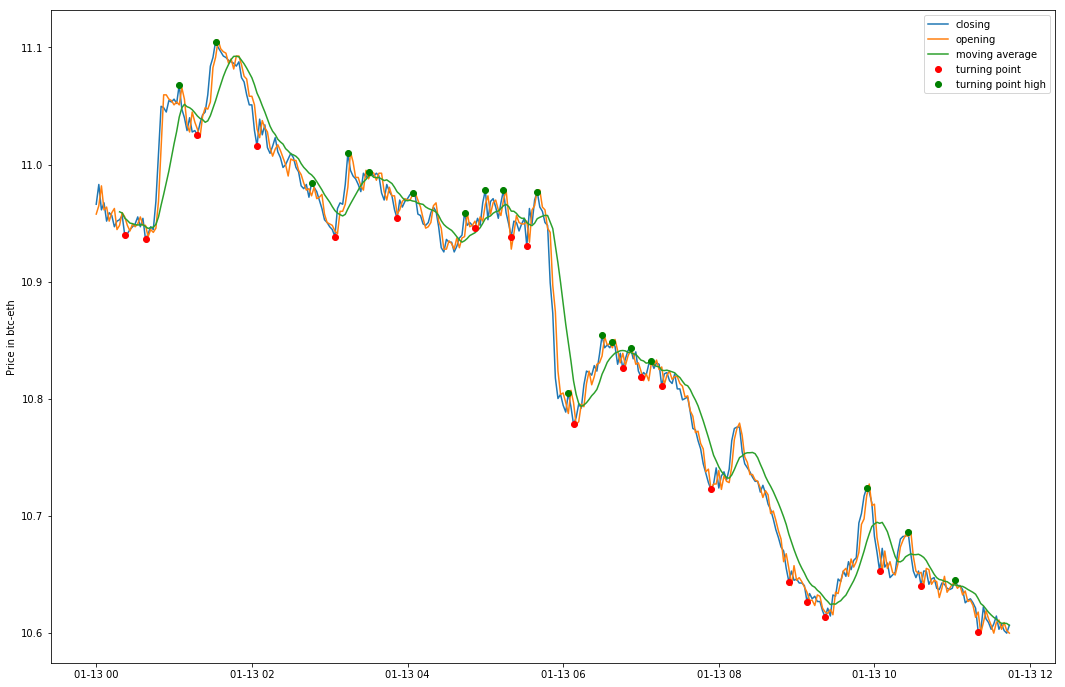

In [95]:
N = 2 # number of iterations
h = df['close'].dropna().copy() # make a series of Highs
l = df['close'].dropna().copy()  # make a series of Lows
for i in range(N):
        h = h.iloc[argrelmax(h.values)[0]] # locate maxima in Highs
        l = l.iloc[argrelmin(l.values)[0]] # locate minima in Lows
        h = h[~h.index.isin(l.index)] # drop index that appear in both
        l = l[~l.index.isin(h.index)] # drop index that appear in both

x = list()
for i in range(len(df.close)):
    if i in l.keys():
        x.append(l[i])
    else:
        x.append(None)
df['close-turning-point'] = pd.Series(x)
        

x = list()
for i in range(len(df.close)):
    if i in h.keys():
        x.append(h[i])
    else:
        x.append(None)
df['close-turning-point-high'] = pd.Series(x)

fig3 = plt.figure(figsize=(18,12))
ax = fig3.add_subplot(1,1,1)

ax.plot(df["time"], df["close"], label='closing')
ax.plot(df["time"], df["open"], label='opening')
ax.plot(df["time"], df["close-avg"], label = 'moving average')
ax.plot(df["time"], df["close-turning-point"], 'o', label = 'turning point', linewidth=2, color="red")
ax.plot(df["time"], df["close-turning-point-high"], 'o', label = 'turning point high', linewidth=2, color="green")

ax.legend(loc='best')
ax.set_ylabel('Price in btc-eth')

In [93]:
invest=200



for index, row in df[['close', 'close-turning-point', 'close-turning-point-high']].iterrows():
        x
        
df

,close,high,low,open,timestamp,volume,time,close-avg,close-eavg,close-deviation,close-avg-diff,close-avg-diff-x,close-avg-diff-x1,close-turning-point,close-turning-point-high
0,10.966100,10.966100,10.95770,10.95770,1515801600,0,2018-01-13 00:00:00,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,10.983000,10.983000,10.96370,10.96490,1515801720,0,2018-01-13 00:02:00,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,10.961300,10.981800,10.96130,10.98180,1515801840,0,2018-01-13 00:04:00,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
3,10.967300,10.970900,10.96130,10.96130,1515801960,0,2018-01-13 00:06:00,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
4,10.951700,10.966100,10.94450,10.96370,1515802080,0,2018-01-13 00:08:00,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
5,10.958900,10.960100,10.94930,10.95170,1515802200,0,2018-01-13 00:10:00,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
6,10.956500,10.964900,10.94930,10.95890,1515802320,0,2018-01-13 00:12:00,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
7,10.946900,10.962500,10.94690,10.96250,1515802440,0,2018-01-13 00:14:00,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
8,10.951700,10.951700,10.94450,10.94450,1515802560,0,2018-01-13 00:16:00,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
9,10.952900,10.952900,10.94810,10.94810,1515802680,0,2018-01-13 00:18:00,10.959630,10.959630,NaN,NaN,False,NaN,NaN,NaN
